In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

Load the data set & Check head

In [78]:
sal_df = pd.read_csv("Salary_Data.csv")
sal_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [79]:
#Rename the columns 
df = sal_df.rename(mapper={"YearsExperience":"YOE","Salary":"SAL"},axis=1) 

In [80]:
# Check for data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOE     30 non-null     float64
 1   SAL     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Checking Correlation heatmap

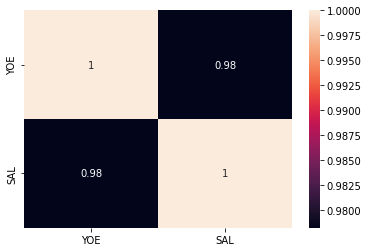

In [81]:
viz = sns.heatmap(df.corr(),annot=True)

1. The correlation between features lies between -1 to 1, that indicates weather it is negative correlation or positive correlation 
2. -1 indicates the negative correlation, +1 indicates positive correlation , 0 indicates there is no correlation  

In [82]:
# Identify the Feature X and Outcome y for creating model
# As the stats model only gives coeficient for X values for calculation B0 will add constant column 1
X = sm.add_constant(df["YOE"])
y = df.SAL
X.head()

C:\Users\AkashMY\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,YOE
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


In [83]:
# Split the data in Train & Test data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 2)
(8, 2)
(22,)
(8,)


In [84]:
# Fitting the model
#from Statsmodles
model_sm = sm.OLS(y_train,X_train).fit()
# from Sklearn 
model_skl = LinearRegression()
model_skl = model_skl.fit(X_train,y_train)

In [85]:
# Check the Coefficients & Intercept for sm 
print(model_sm.params)

const    24840.115992
YOE       9541.420496
dtype: float64


In [88]:
# Check the Coefficients & Intercept for Sklearn
print(f"Intercept = {model_skl.intercept_}")
print(f"Coefficient = {model_skl.coef_[1]}")

Intercept = 24840.115991734187
Coefficient = 9541.42049573186


Both models are giving same Intercept & Coefficient

Interpretation :
1. For 0 YOE, y will be 24840.115
2. For 1 year increase in YOE, y will increase by 9541.42

In [89]:
# To check the summarised Version of model
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAL   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     363.8
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           2.66e-14
Time:                        13:28:39   Log-Likelihood:                -223.27
No. Observations:                  22   AIC:                             450.5
Df Residuals:                      20   BIC:                             452.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.484e+04   3087.138      8.046      0.000    1.84e+04    3.13e+04
YOE         9541.4205    500.214     19.075      0.000    8497.993    1.06e+04
==============================================================================
Omnibus:                        3.164   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.006
Skew:                           0.527   Prob(JB):                        0.367
Kurtosis:                       1.962   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
1. R_squared = 0.948 means model can explain 94.8 % variation in salary
2. P_value = 0.000 means there is  Statistically Significant Relationship between X & Y


In [90]:
# Predicting for test data
y_predicted_test = model_sm.predict(X_test)
y_predicted_train = model_sm.predict(X_train)

Measuring the Accuracy of Predictions

In [94]:
# By using R2
# R2 for train data 
train_r2 = np.abs(r2_score(y_train,y_predicted_train))
# R2 for test data
test_r2 = np.abs(r2_score(y_test,y_predicted_test))

print(f"Training_R2 = {train_r2}\nTesting_R2 = {test_r2}")

Training_R2 = 0.9478954299656832
Testing_R2 = 0.9806981989176887


For Training model Explaining 94.78% & For Test data model Explaining 98.06%

In [95]:
# By using Root Mean Squared Error
#Training data
train_rmse = np.sqrt(mean_squared_error(y_train,y_predicted_train))
#Testing data 
test_rmse = np.sqrt(mean_squared_error(y_test,y_predicted_test))

print(f"Training_RMSE = {train_rmse}\nTesting_RMSE = {test_rmse}")

Training_RMSE = 6182.756908812778
Testing_RMSE = 3633.4902654576513


For Training data Average Error model makes in predicting Y = 6182.72<br>
For Testing data Average Error model makes in predicting Y = 3633.49
